In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split as tts
from datetime import datetime
from scipy import stats as st

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
data = pd.read_csv('nike_sales_2024.csv')

In [4]:
data

Month         Region Main_Category Sub_Category       Product_Line  \
0    November          India     Equipment         Bags           Gym Sack   
1     January          India     Equipment  Accessories               Hats   
2     October          India       Apparel         Tops        Tech Fleece   
3    December  Greater China      Footwear      Cricket      Vapor Cricket   
4         May  Greater China     Equipment        Socks  Performance Socks   
..        ...            ...           ...          ...                ...   
995   October          India     Equipment  Accessories               Hats   
996      July         Europe     Equipment        Socks  Performance Socks   
997    August          Japan      Footwear     Football     Phantom Vision   
998       May    South Korea     Equipment        Socks         Crew Socks   
999  December          Japan      Footwear      Cricket      Vapor Cricket   

    Price_Tier  Units_Sold  Revenue_USD  Online_Sales_Percentage  Retail_Price  
0       Budget       48356     14506800                       73           300  
1       Budget        9842      2066820                       50           210  
2    Mid-Range       25079      1755530                       90            70  
3      Premium       41404      8694840                       58           210  
4      Premium       33569      5371040                       53           160  
..         ...         ...          ...                      ...           ...  
995  Mid-Range        9870       987000                       82           100  
996  Mid-Range       14668      2640240                       88           180  
997    Premium       15078      2261700                       74           150  
998    Premium       26242      1312100                       52            50  
999  Mid-Range       18133      5077240                       68           280  

[1000 rows x 10 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    1000 non-null   object
 1   Region                   1000 non-null   object
 2   Main_Category            1000 non-null   object
 3   Sub_Category             1000 non-null   object
 4   Product_Line             1000 non-null   object
 5   Price_Tier               1000 non-null   object
 6   Units_Sold               1000 non-null   int64 
 7   Revenue_USD              1000 non-null   int64 
 8   Online_Sales_Percentage  1000 non-null   int64 
 9   Retail_Price             1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [6]:
data.sort_values('Units_Sold', ascending=False, inplace=True)

In [7]:
data

Month          Region Main_Category Sub_Category       Product_Line  \
242  November   Greater China     Equipment         Bags           Gym Sack   
71   February     South Korea     Equipment         Bags           Backpack   
733  November     South Korea      Footwear      Cricket      Vapor Cricket   
507    August           Japan     Equipment        Socks  Performance Socks   
109   October          Europe     Equipment        Socks  Performance Socks   
..        ...             ...           ...          ...                ...   
140     March  Southeast Asia      Footwear      Cricket      Vapor Cricket   
809   October          Europe     Equipment         Bags           Backpack   
257      July  Southeast Asia      Footwear    Lifestyle        Air Force 1   
937      June          Europe     Equipment         Bags           Backpack   
368   January  Southeast Asia       Apparel         Tops         Therma-FIT   

    Price_Tier  Units_Sold  Revenue_USD  Online_Sales_Percentage  Retail_Price  
242     Budget       49992     13997760                       64           280  
71      Budget       49926      3494820                       74            70  
733     Budget       49867     11968080                       66           240  
507    Premium       49808      6973120                       53           140  
109     Budget       49804     12949040                       77           260  
..         ...         ...          ...                      ...           ...  
140  Mid-Range        5250       577500                       88           110  
809     Budget        5248      1574400                       73           300  
257    Premium        5233       313980                       55            60  
937     Budget        5204      1092840                       86           210  
368     Budget        5028      1458120                       61           290  

[1000 rows x 10 columns]

In [8]:
 region_sales = data.groupby(['Region', 'Main_Category'], as_index =False).agg({'Units_Sold': pd.Series.sum})

In [9]:
region_sales

Region Main_Category  Units_Sold
0          America       Apparel     1529686
1          America     Equipment     1523121
2          America      Footwear     1258191
3           Europe       Apparel     1306036
4           Europe     Equipment     1290063
5           Europe      Footwear     1117390
6    Greater China       Apparel     1662390
7    Greater China     Equipment     1568692
8    Greater China      Footwear     1451281
9            India       Apparel     1345756
10           India     Equipment     1621198
11           India      Footwear     1127805
12           Japan       Apparel     1568313
13           Japan     Equipment     1142284
14           Japan      Footwear     1533916
15     South Korea       Apparel     1412998
16     South Korea     Equipment     1706490
17     South Korea      Footwear     1006336
18  Southeast Asia       Apparel     1086915
19  Southeast Asia     Equipment     1140001
20  Southeast Asia      Footwear     1100089

In [10]:
fig = px.pie(values=region_sales.Units_Sold, labels=region_sales.Region, names=region_sales.Region, title='Units sold by region')
fig.update_layout(height=700)
fig.update_traces(textinfo='percent+label')
fig.show()

In [11]:
cat_unit_sold = data.groupby(['Main_Category'], as_index=False).agg({'Units_Sold':pd.Series.sum})
cat_unit_sold

Main_Category  Units_Sold
0       Apparel     9912094
1     Equipment     9991849
2      Footwear     8595008

In [12]:
fig2 = px.pie(values=cat_unit_sold.Units_Sold, labels=cat_unit_sold.Main_Category, names=cat_unit_sold.Main_Category, title='Units sold by Main Category')
fig2.update_layout(height=700)
fig2.update_traces(textinfo='percent+label')
fig2.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 242 to 368
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    1000 non-null   object
 1   Region                   1000 non-null   object
 2   Main_Category            1000 non-null   object
 3   Sub_Category             1000 non-null   object
 4   Product_Line             1000 non-null   object
 5   Price_Tier               1000 non-null   object
 6   Units_Sold               1000 non-null   int64 
 7   Revenue_USD              1000 non-null   int64 
 8   Online_Sales_Percentage  1000 non-null   int64 
 9   Retail_Price             1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [14]:
sub_cat_group = data.groupby(['Sub_Category'], as_index=False).agg({'Revenue_USD': pd.Series.sum})
sub_cat_group

Sub_Category  Revenue_USD
0   Accessories    629192700
1          Bags    593442370
2    Basketball    277342380
3       Cricket    384372340
4      Football    303153710
5     Lifestyle    314578720
6     Outerwear    718926880
7   Performance    497096740
8       Running    253727750
9         Socks    554690320
10         Tops    513052500

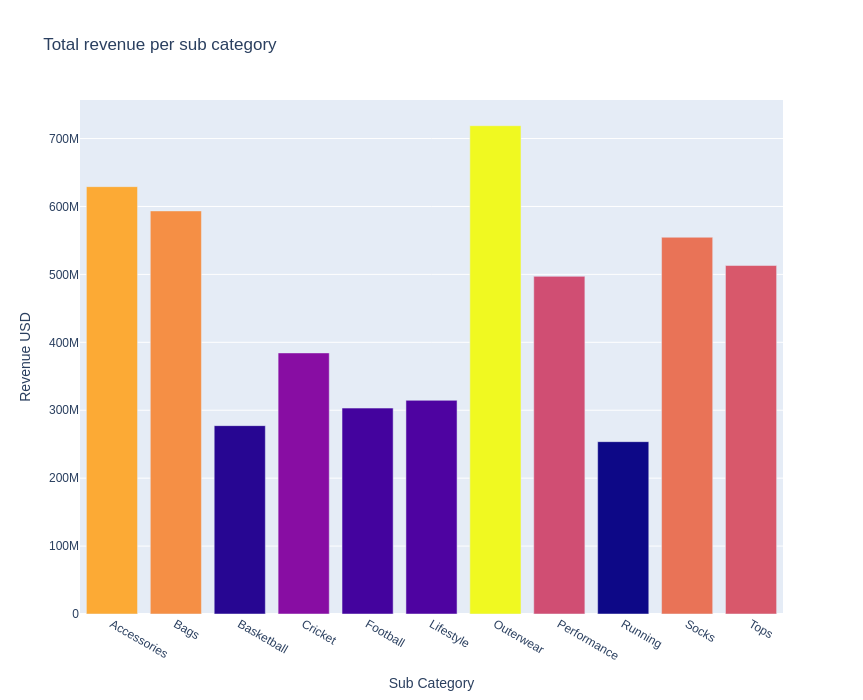

In [15]:
bar = px.bar(sub_cat_group, x='Sub_Category', y='Revenue_USD', title='Total revenue per sub category', color='Revenue_USD')
bar.update(layout_coloraxis_showscale=False)
bar.update_layout(height=700, xaxis_title='Sub Category', yaxis_title='Revenue USD')
bar.show()

In [16]:
avr_online_sals_per_sub_cat = data.groupby(['Sub_Category'], as_index=False).agg({'Online_Sales_Percentage':pd.Series.mean})

In [17]:
avr_online_sals_per_sub_cat

Sub_Category  Online_Sales_Percentage
0   Accessories                    72.36
1          Bags                    67.82
2    Basketball                    70.17
3       Cricket                    72.00
4      Football                    69.73
5     Lifestyle                    69.77
6     Outerwear                    70.14
7   Performance                    71.18
8       Running                    68.91
9         Socks                    69.20
10         Tops                    69.17

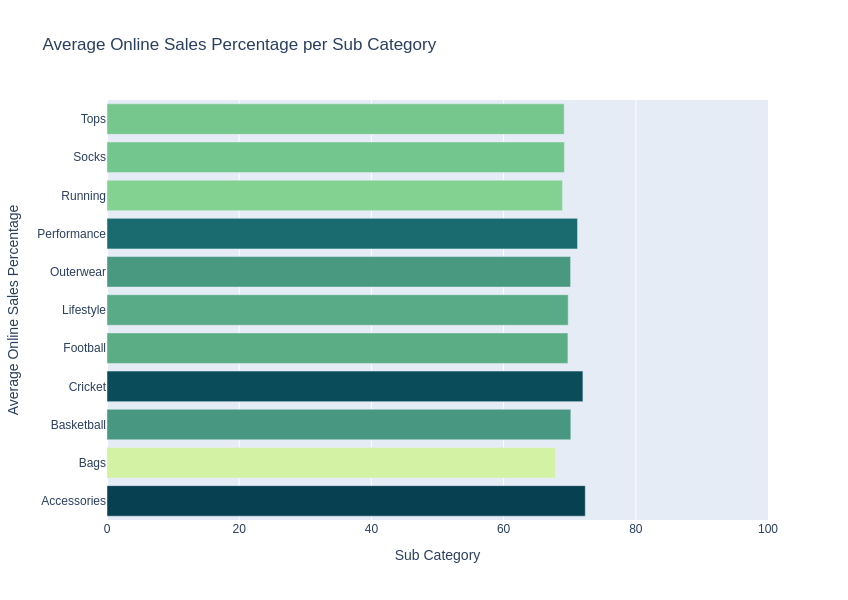

In [18]:
bar = px.bar(avr_online_sals_per_sub_cat, 
             y='Sub_Category',orientation='h', 
             x='Online_Sales_Percentage', 
             color_continuous_scale='emrld', 
             title='Average Online Sales Percentage per Sub Category', 
             color='Online_Sales_Percentage',
            range_x=[0, 100])
bar.update_layout(height=600, xaxis_title='Sub Category', yaxis_title='Average Online Sales Percentage')
bar.update(layout_coloraxis_showscale=False)
bar.show()

In [89]:
date_num = []
for n in data.Month:
    date_num.append(datetime.strptime(n, '%B').month)
data['date_num'] = date_num
data['date_num_2'] = data['date_num']

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 242 to 368
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    1000 non-null   object
 1   Region                   1000 non-null   object
 2   Main_Category            1000 non-null   object
 3   Sub_Category             1000 non-null   object
 4   Product_Line             1000 non-null   object
 5   Price_Tier               1000 non-null   object
 6   Units_Sold               1000 non-null   int64 
 7   Revenue_USD              1000 non-null   int64 
 8   Online_Sales_Percentage  1000 non-null   int64 
 9   Retail_Price             1000 non-null   int64 
 10  date_num                 1000 non-null   int64 
 11  date_num_2               1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 101.6+ KB


In [93]:
year = '2024'
day = '01'
str_month = data.date_num.astype(str)     

In [95]:
date_ = [] 
date_.append(str_month.values+'-'+day+'-'+ year)
str_month = str_month.values+'-'+day+'-'+ year

In [96]:
str_month
prop_date = pd.to_datetime(str_month)
data['date_num'] = prop_date

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 242 to 368
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    1000 non-null   object        
 1   Region                   1000 non-null   object        
 2   Main_Category            1000 non-null   object        
 3   Sub_Category             1000 non-null   object        
 4   Product_Line             1000 non-null   object        
 5   Price_Tier               1000 non-null   object        
 6   Units_Sold               1000 non-null   int64         
 7   Revenue_USD              1000 non-null   int64         
 8   Online_Sales_Percentage  1000 non-null   int64         
 9   Retail_Price             1000 non-null   int64         
 10  date_num                 1000 non-null   datetime64[ns]
 11  date_num_2               1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object

In [101]:
data.date_num

242   2024-11-01
71    2024-02-01
733   2024-11-01
507   2024-08-01
109   2024-10-01
         ...    
140   2024-03-01
809   2024-10-01
257   2024-07-01
937   2024-06-01
368   2024-01-01
Name: date_num, Length: 1000, dtype: datetime64[ns]

In [102]:
data.head()

Month         Region Main_Category Sub_Category       Product_Line  \
242  November  Greater China     Equipment         Bags           Gym Sack   
71   February    South Korea     Equipment         Bags           Backpack   
733  November    South Korea      Footwear      Cricket      Vapor Cricket   
507    August          Japan     Equipment        Socks  Performance Socks   
109   October         Europe     Equipment        Socks  Performance Socks   

    Price_Tier  Units_Sold  Revenue_USD  Online_Sales_Percentage  \
242     Budget       49992     13997760                       64   
71      Budget       49926      3494820                       74   
733     Budget       49867     11968080                       66   
507    Premium       49808      6973120                       53   
109     Budget       49804     12949040                       77   

     Retail_Price   date_num  date_num_2  
242           280 2024-11-01          11  
71             70 2024-02-01           2  
733           240 2024-11-01          11  
507           140 2024-08-01           8  
109           260 2024-10-01          10

In [104]:
sub_group_date = data.groupby(['Sub_Category', 'date_num'], as_index=False).agg({"Revenue_USD":pd.Series.mean})

In [105]:
sub_group_date.resample('ME', on='date_num')

In [107]:
sub_group_date

Sub_Category   date_num  Revenue_USD
0    Accessories 2024-01-01   4956997.00
1    Accessories 2024-02-01   4116474.29
2    Accessories 2024-03-01   6394416.00
3    Accessories 2024-04-01   6009461.54
4    Accessories 2024-05-01   6505888.00
..           ...        ...          ...
127         Tops 2024-08-01   4733372.00
128         Tops 2024-09-01   4721456.36
129         Tops 2024-10-01   3878056.67
130         Tops 2024-11-01   3579042.00
131         Tops 2024-12-01   5190264.00

[132 rows x 3 columns]

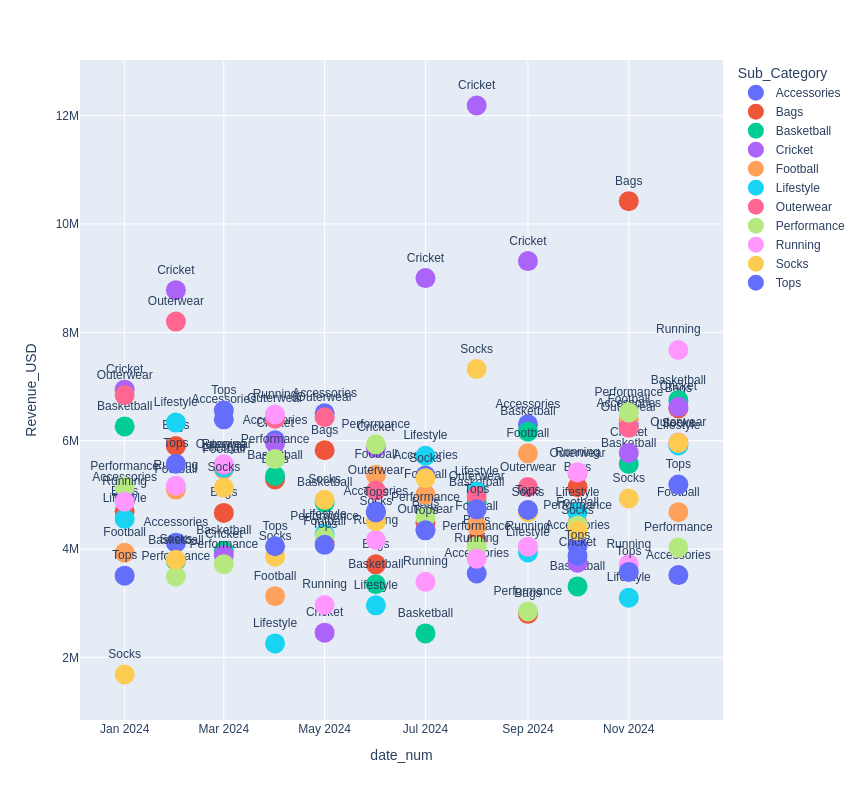

In [109]:
line = px.scatter(sub_group_date, x='date_num', 
               y='Revenue_USD', 
               color='Sub_Category',
               text = 'Sub_Category'
               )
line.update_layout(height=800, width=1700)
line.update_traces(marker_size=20, textposition='top center')
line.show()

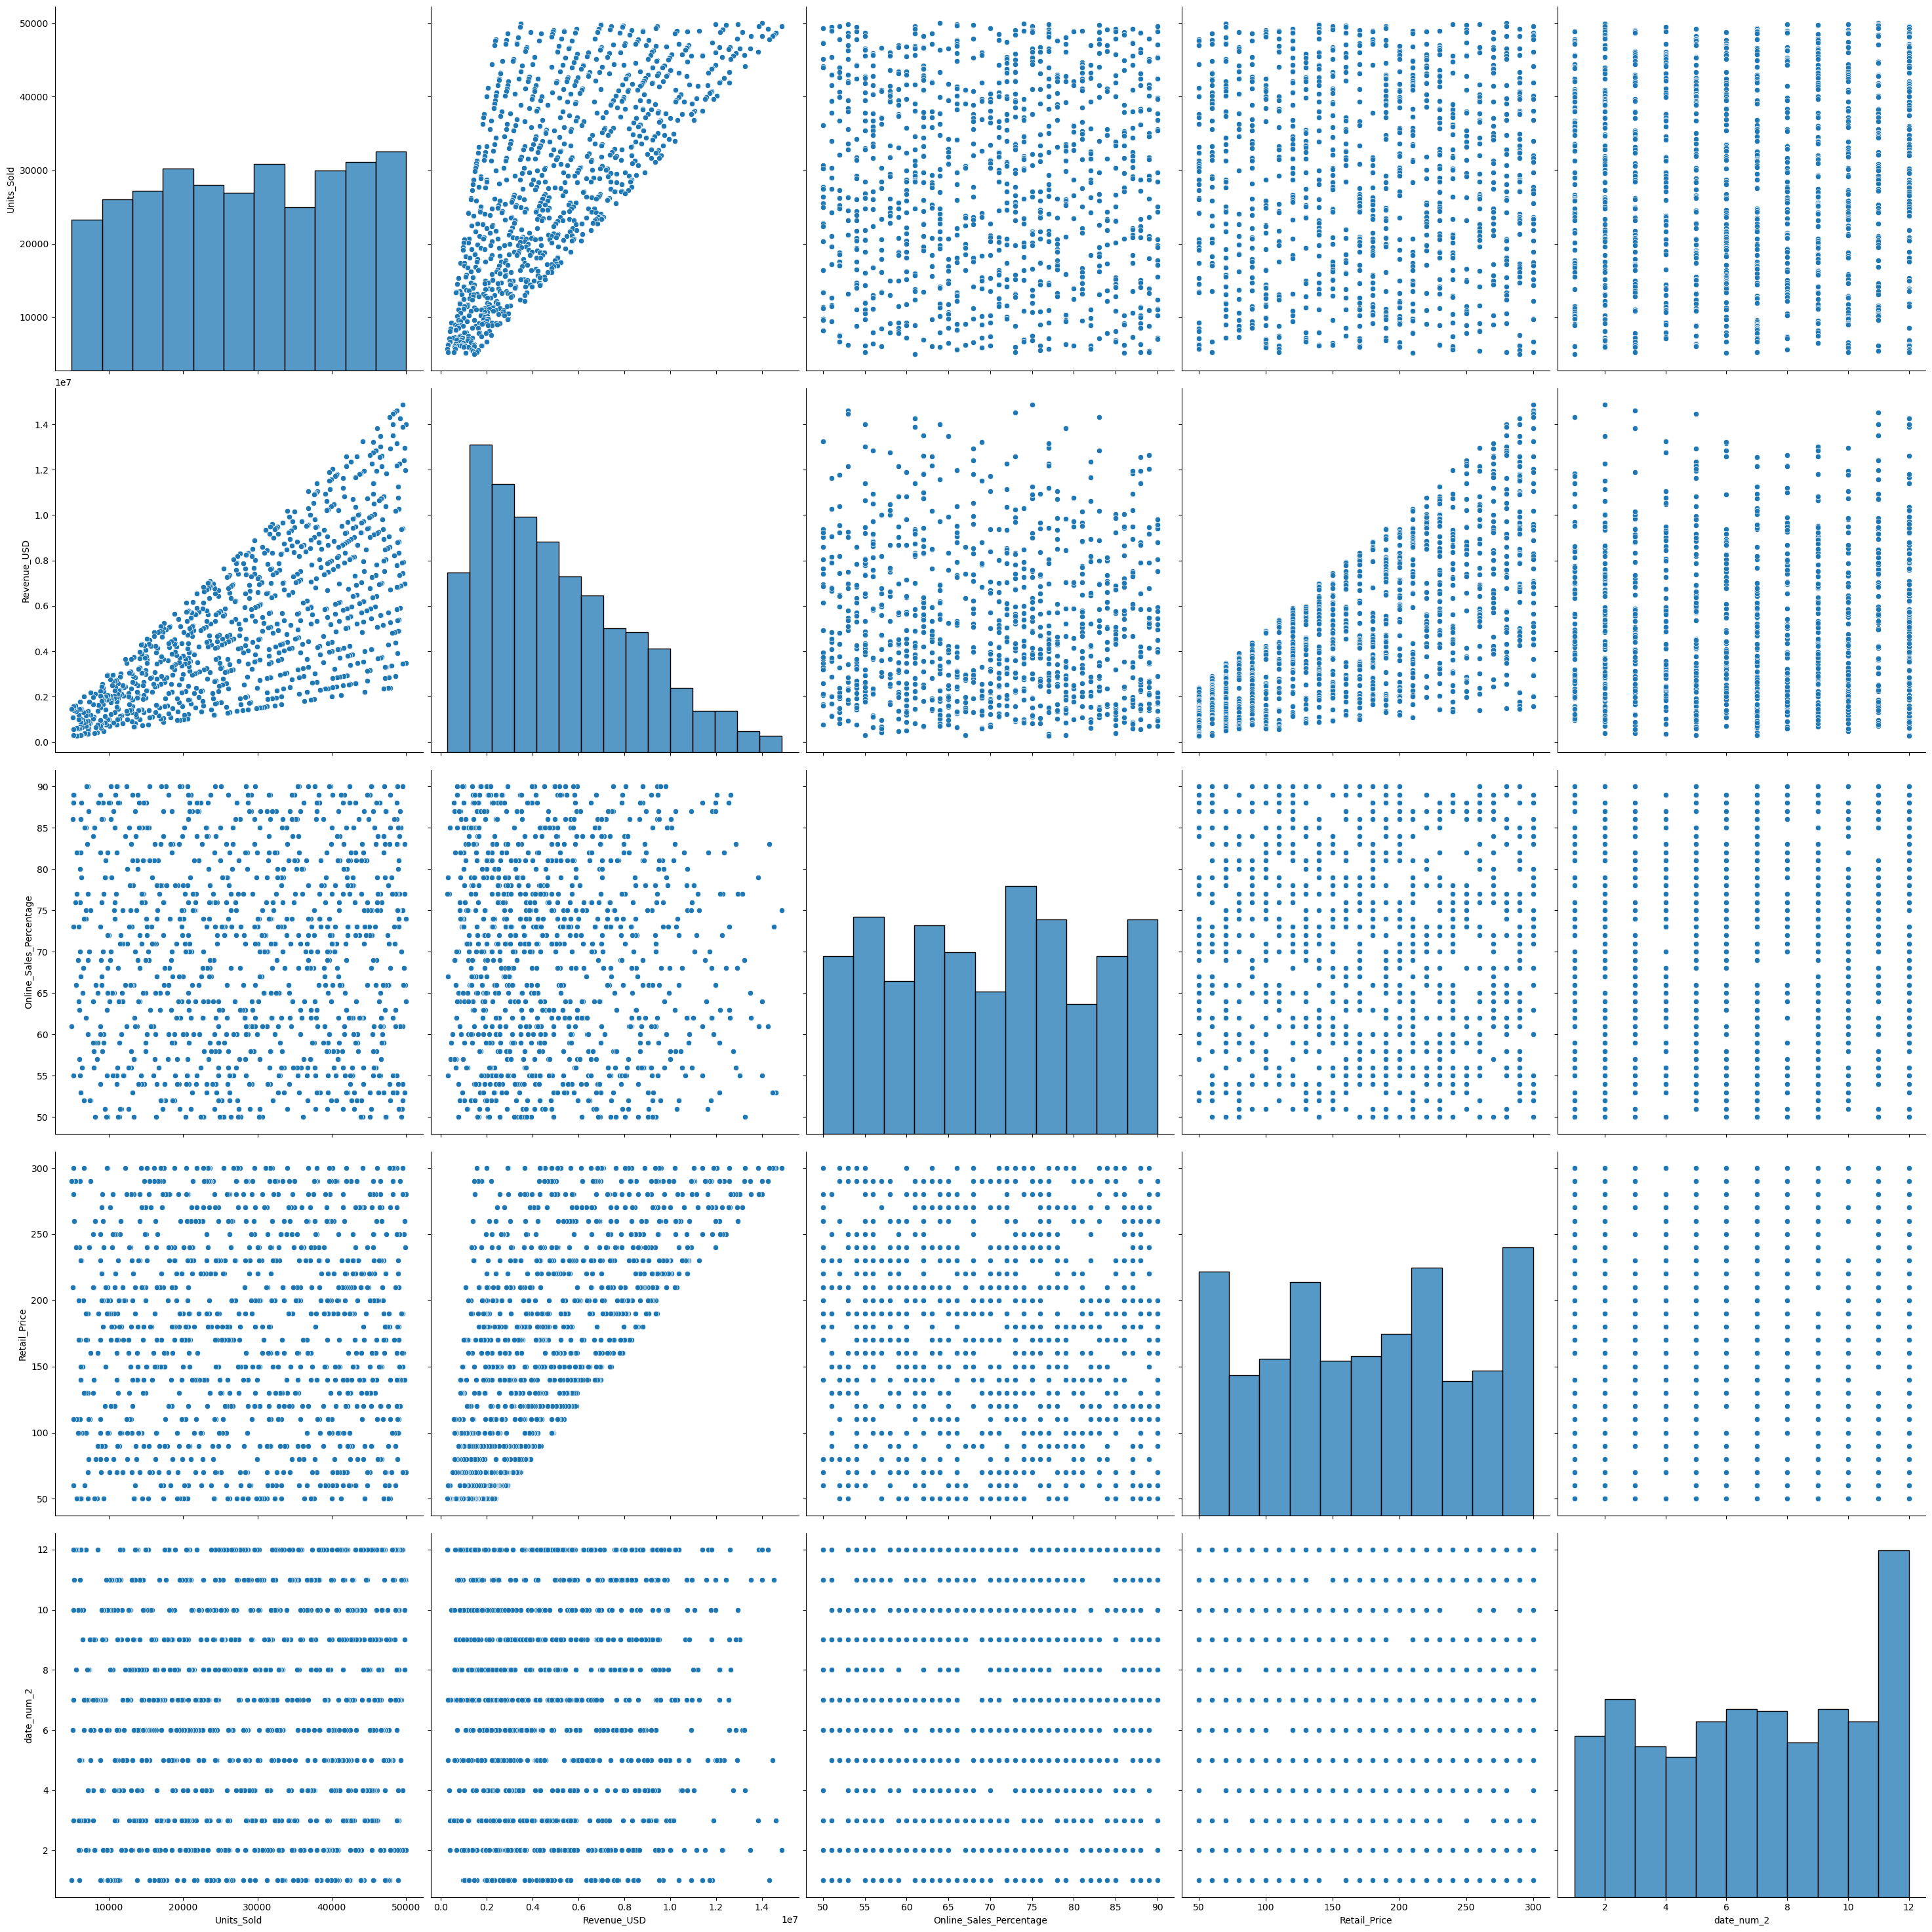

In [149]:
sns.pairplot(data, height=6)
plt.show()

In [123]:
data.Revenue_USD.describe()

count       1000.00
mean     5039576.41
std      3267216.81
min       287400.00
25%      2344675.00
50%      4328020.00
75%      7264942.50
max     14864700.00
Name: Revenue_USD, dtype: float64

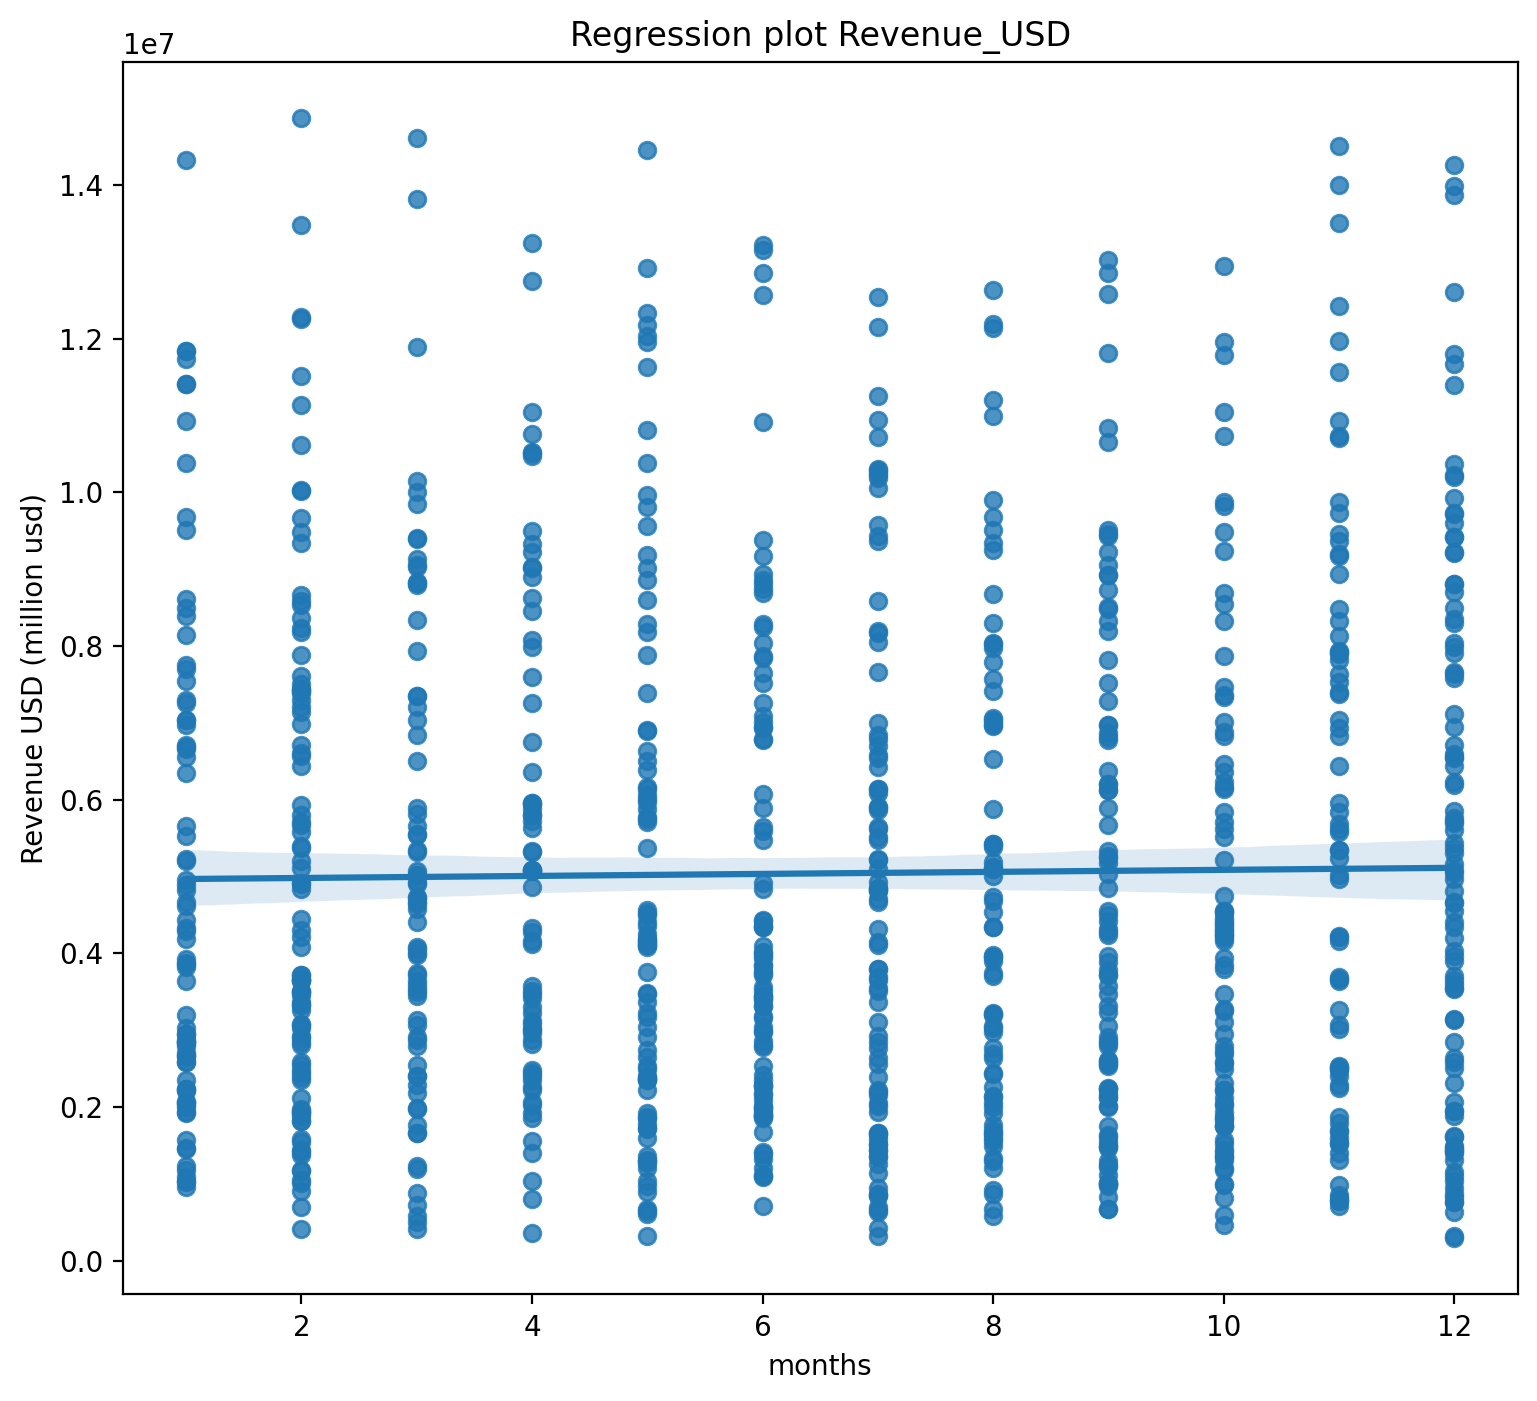

In [125]:
plt.figure(figsize=(9, 8), dpi=200)
sns.regplot(data, x='date_num_2', y='Revenue_USD')
plt.title('Regression plot Revenue_USD')
plt.xlabel('months')
plt.ylabel('Revenue USD (million usd)')
plt.savefig('Regression plot rebenue_USD')
plt.show()

In [127]:
data.Units_Sold.describe()

count    1000.00
mean    28498.95
std     12926.50
min      5028.00
25%     17554.25
50%     28685.00
75%     40026.00
max     49992.00
Name: Units_Sold, dtype: float64

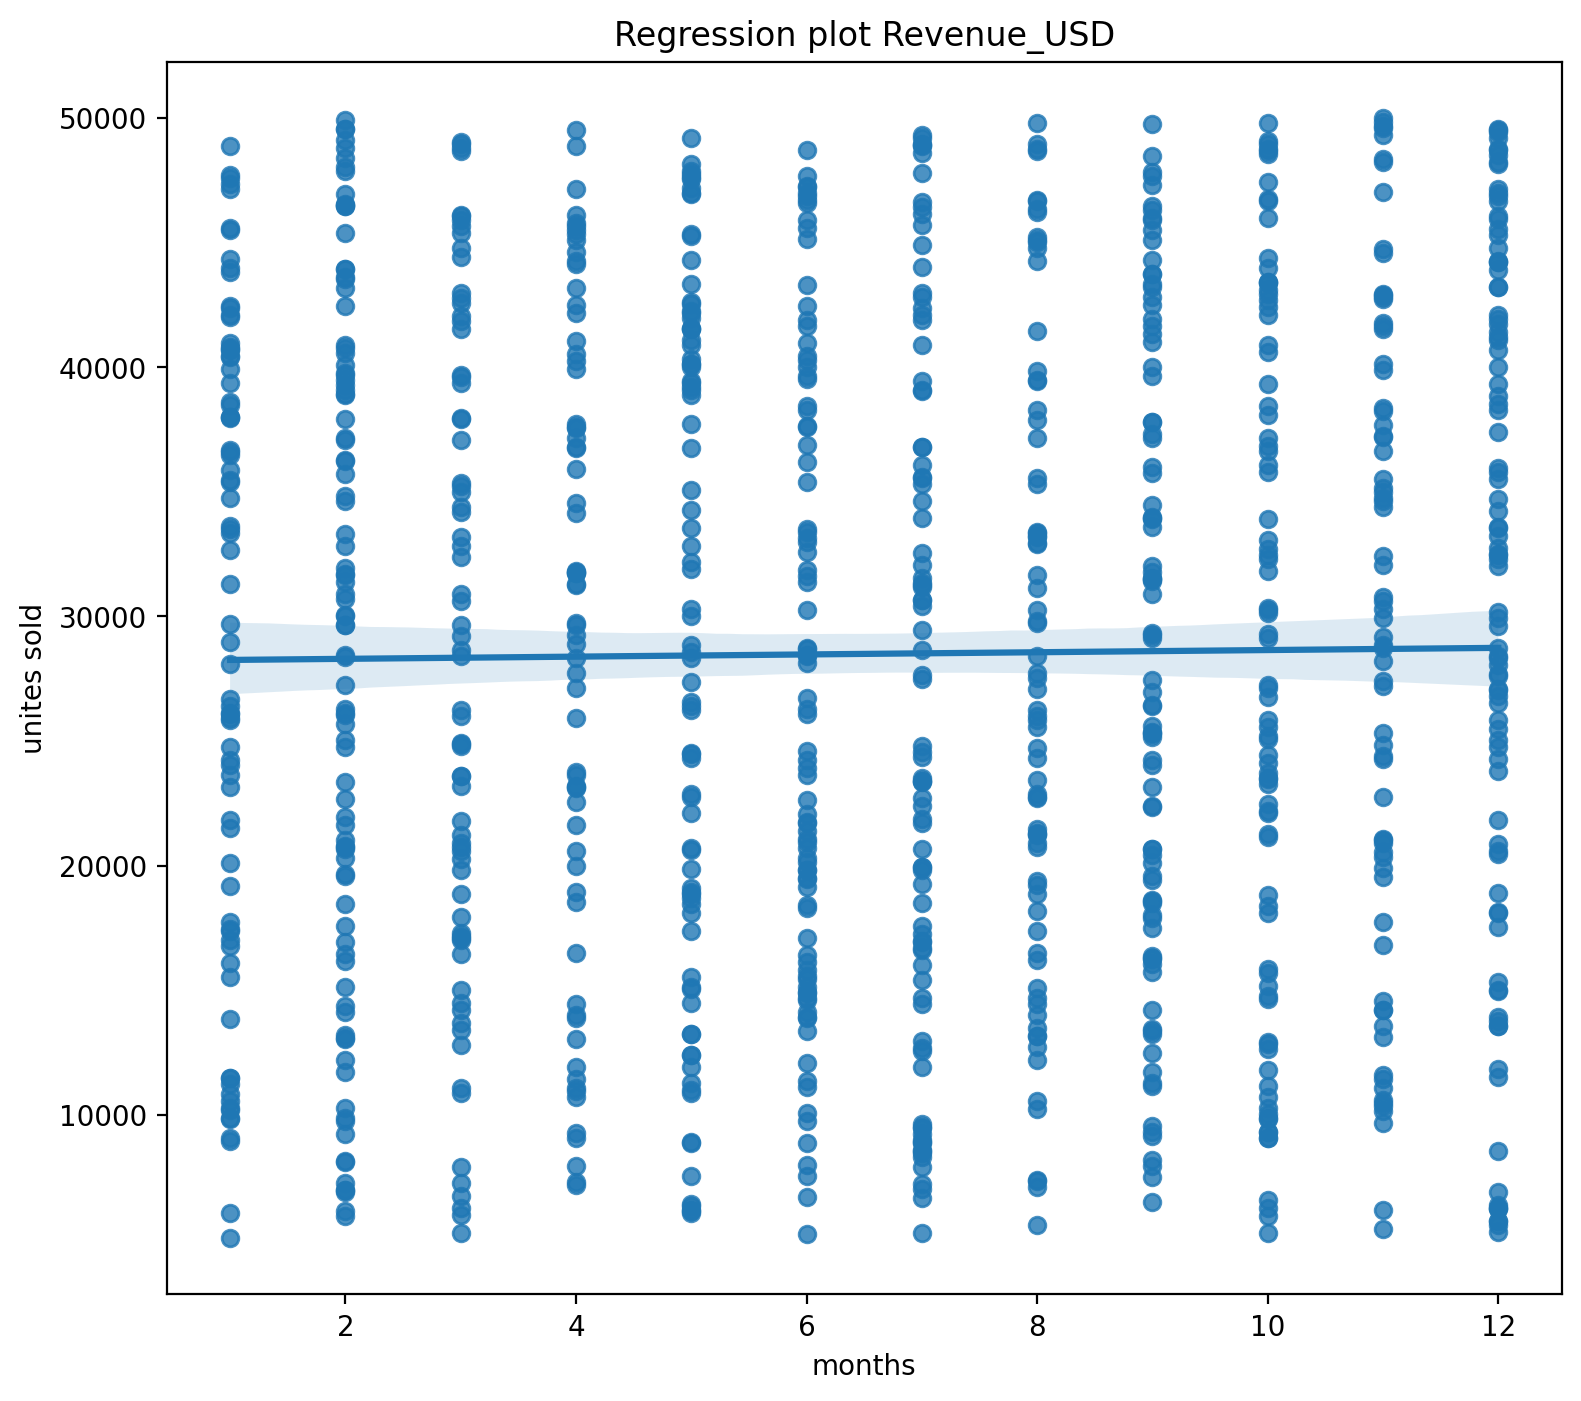

In [117]:
plt.figure(figsize=(9, 8), dpi=200)
sns.regplot(data, x='date_num_2', y='Units_Sold')
plt.title('Regression plot Revenue_USD')
plt.xlabel('months')
plt.ylabel('unites sold')
plt.savefig('Regression plot Sold Units')
plt.show()

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 242 to 368
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    1000 non-null   object        
 1   Region                   1000 non-null   object        
 2   Main_Category            1000 non-null   object        
 3   Sub_Category             1000 non-null   object        
 4   Product_Line             1000 non-null   object        
 5   Price_Tier               1000 non-null   object        
 6   Units_Sold               1000 non-null   int64         
 7   Revenue_USD              1000 non-null   int64         
 8   Online_Sales_Percentage  1000 non-null   int64         
 9   Retail_Price             1000 non-null   int64         
 10  date_num                 1000 non-null   datetime64[ns]
 11  date_num_2               1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object

In [137]:
regression = LinearRegression()

In [139]:
target = data.Revenue_USD
feature = data[['Units_Sold', 'Online_Sales_Percentage', 'Retail_Price', 'date_num_2']]

In [143]:
regression.fit(feature, target)

LinearRegression()

In [147]:
regression.score(feature, target)*100

91.42779522739421

In [171]:
t_test, p_vals = st.ttest_ind(feature.Retail_Price, target)

In [179]:
print(f'p_vals: {p_vals} and t_test: {t_test}')

p_vals: 0.0 and t_test: -48.77540498475918


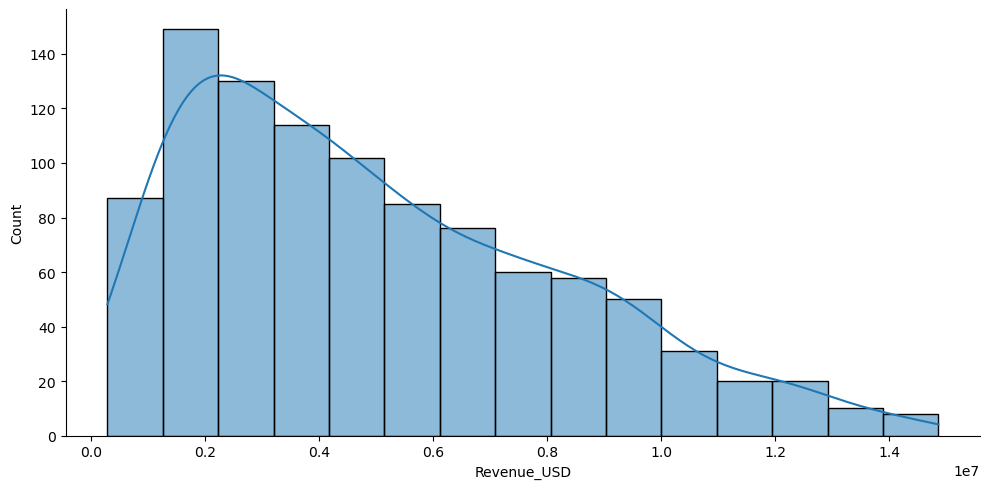

In [183]:
sns.displot(data, x='Revenue_USD', kde=True, aspect=2)
plt.show()

In [185]:
X_train, X_test, y_train, y_test = tts(feature, target, train_size=0.8)

In [189]:
regression.fit(X_train, y_train)

LinearRegression()

In [193]:
regression.score(X_train, y_train)*100

91.56089432694488

In [197]:
regression_coef = pd.DataFrame(regression.coef_)

In [201]:
regression_coef.index = feature.columns

In [203]:
regression_coef

0
Units_Sold                172.80
Online_Sales_Percentage  1134.82
Retail_Price            28566.31
date_num_2              12014.42

In [207]:
predicted_vals = regression.predict(X_train)
residuals = (y_train - predicted_vals)

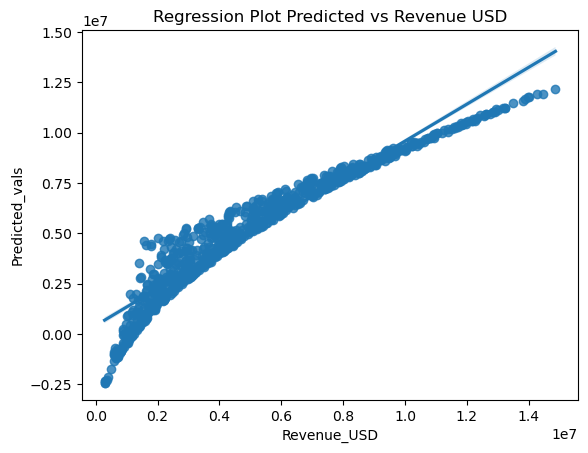

In [217]:
plt1 = sns.regplot(x=y_train, y=predicted_vals)
plt.ylabel('Predicted_vals')
plt.title('Regression Plot Predicted vs Revenue USD')
#plt.savefig('Regression Plot Predicted vs Revenue USD')
plt.show()

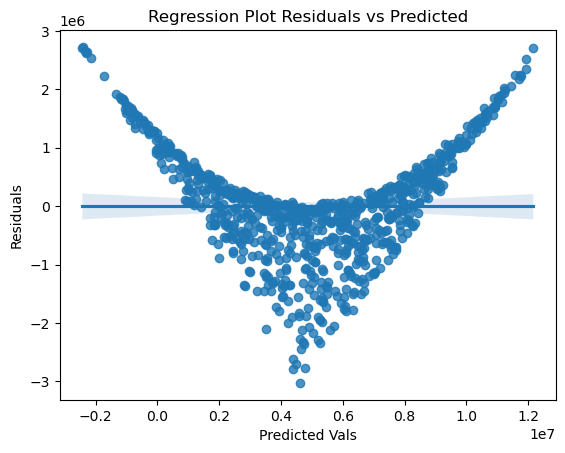

In [219]:
plt1 = sns.regplot(y=residuals, x=predicted_vals)
plt.ylabel('Residuals')
plt.xlabel('Predicted Vals')
plt.title('Regression Plot Residuals vs Predicted')
plt.savefig('Regression Plot Residuals vs Predicted')
plt.show()

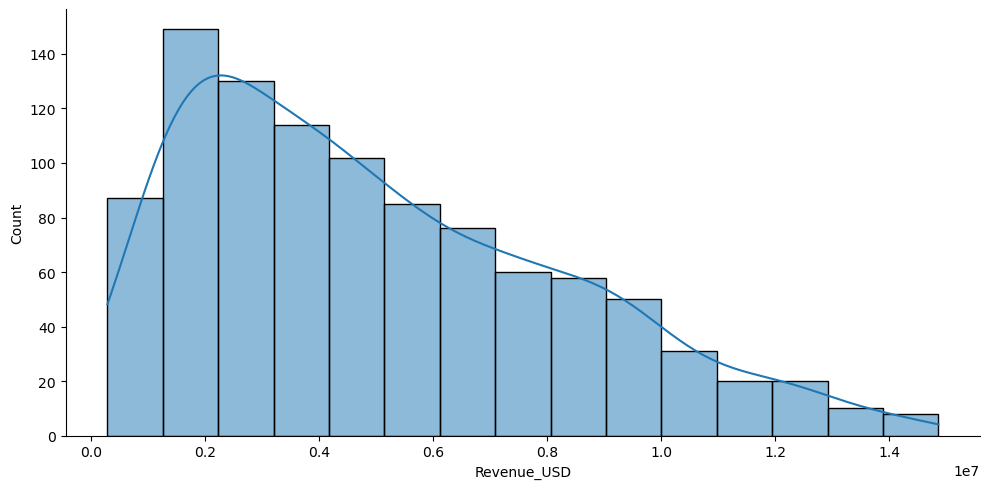

In [227]:
sns.displot(data , x='Revenue_USD', kde=True, aspect=2)

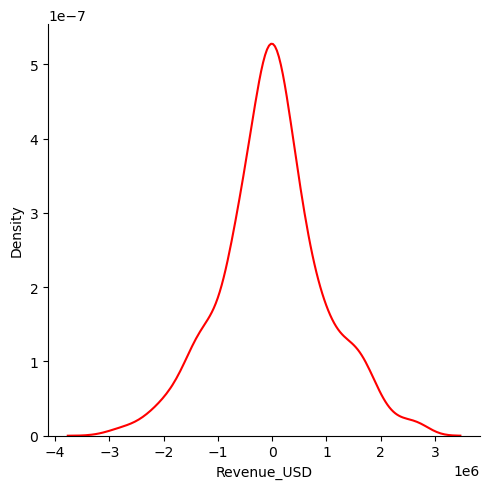

In [237]:
sns.displot(residuals, kind='kde', color='red')
plt.show()

In [245]:
print(f'{round(residuals.mean(),2)}')

-0.0


In [247]:
print(f'{round(residuals.skew(),2)}')

0.03


In [287]:
feature_avr = feature.mean().values
feature_stats = pd.DataFrame(feature_avr.reshape(1, len(feature.columns)), columns=feature.columns)

In [289]:
feature_stats

Units_Sold  Online_Sales_Percentage  Retail_Price  date_num_2
0    28498.95                    70.04        176.32        6.58

In [291]:
regression.predict(feature_stats)

array([5039182.0151028])

In [299]:
ave_rev_month = data.groupby(['date_num']).agg({'Revenue_USD': pd.Series.mean})

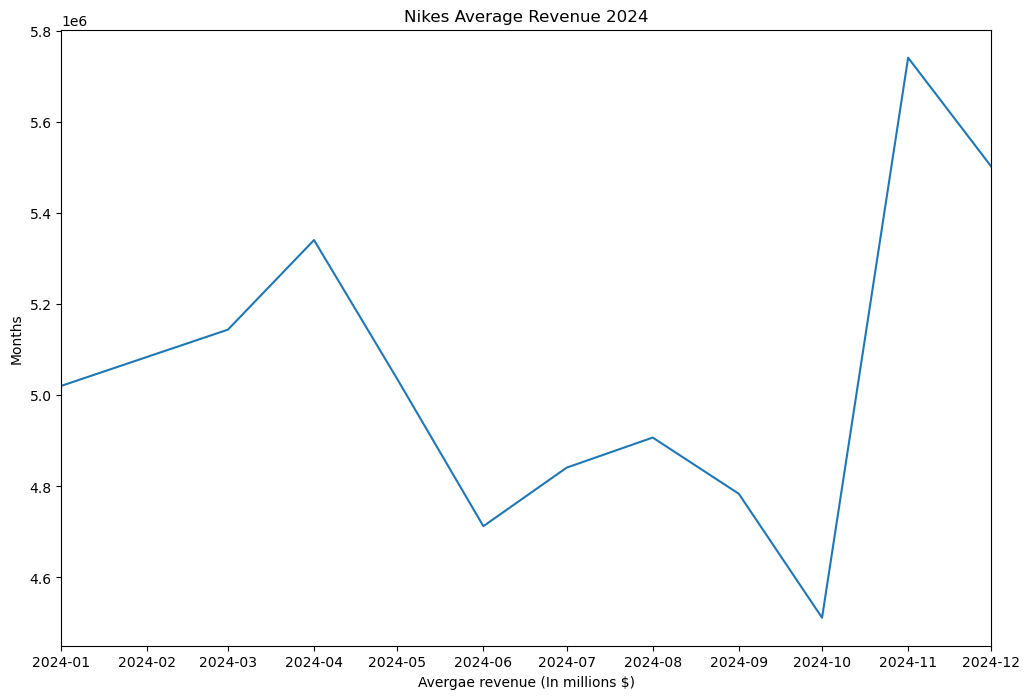

In [326]:
plt.figure(figsize=(12, 8))
ax1 = plt.gca()
ax1.set_xlim(xmax=ave_rev_month.index.max(), xmin=ave_rev_month.index.min())
ax1.set_xlabel('Avergae revenue (In millions $)')
ax1.set_ylabel('Months')
plt.title('Nikes Average Revenue 2024')
ax1.plot(ave_rev_month.index, ave_rev_month.Revenue_USD)
plt.savefig('Nikes Average Revenue 2024')
plt.show()